<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/12_Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q-learning
This is a simple grid maze problem. The task is to find the shortest path from S(tart) to G(oal) while avoiding obstacles. The final graph displays the action selection probabilities for each grid cell. As the agent approaches the goal, deterministic actions become apparent. Note that these actions are determined using a brute-force strategy.

Episode 100/1000, Steps: 24, Total Reward: 7.70
Episode 200/1000, Steps: 20, Total Reward: 8.10
Episode 300/1000, Steps: 18, Total Reward: 8.30
Episode 400/1000, Steps: 18, Total Reward: 8.30
Episode 500/1000, Steps: 20, Total Reward: 8.10
Episode 600/1000, Steps: 21, Total Reward: 5.30
Episode 700/1000, Steps: 19, Total Reward: 7.30
Episode 800/1000, Steps: 18, Total Reward: 8.30
Episode 900/1000, Steps: 18, Total Reward: 8.30
Episode 1000/1000, Steps: 18, Total Reward: 8.30
Learned Policy:
S>>vv>>>v<
vvXvv<>vvv
vvX>v>>vv^
vvX>v>>>vv
>vX>v>>>vv
vvv>vXX>vv
>>>>vXX>vv
>>>>vvvXvv
v>>>>>>>>v
^>>^^^>>>G


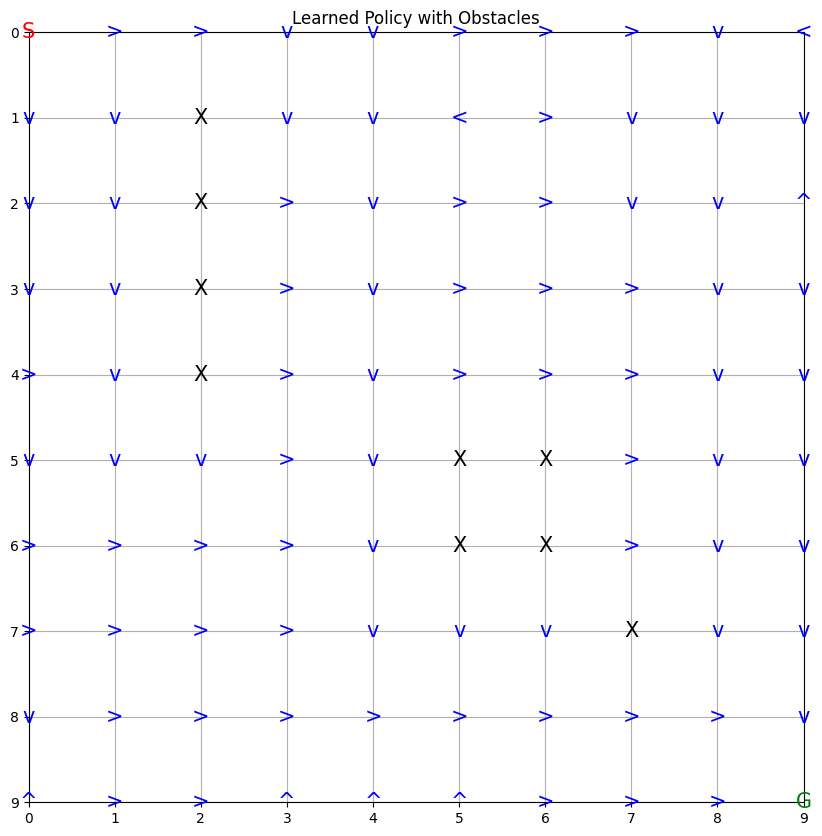

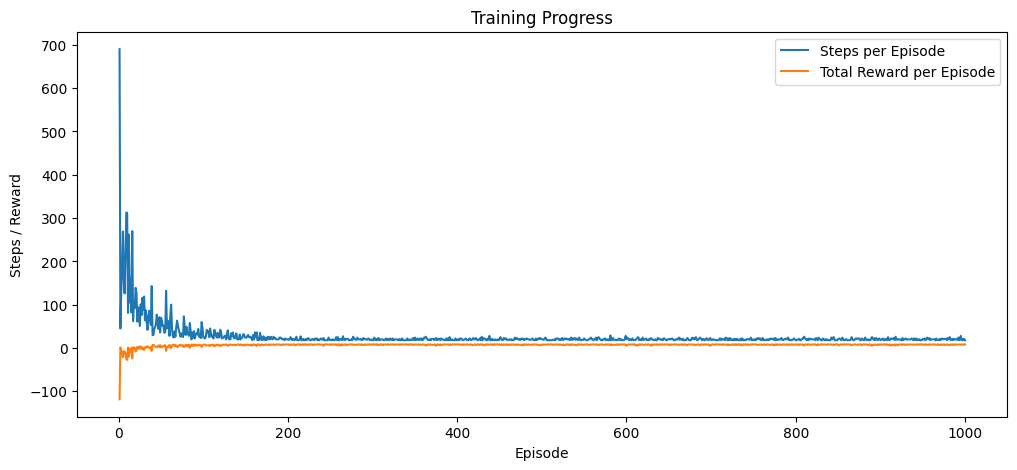

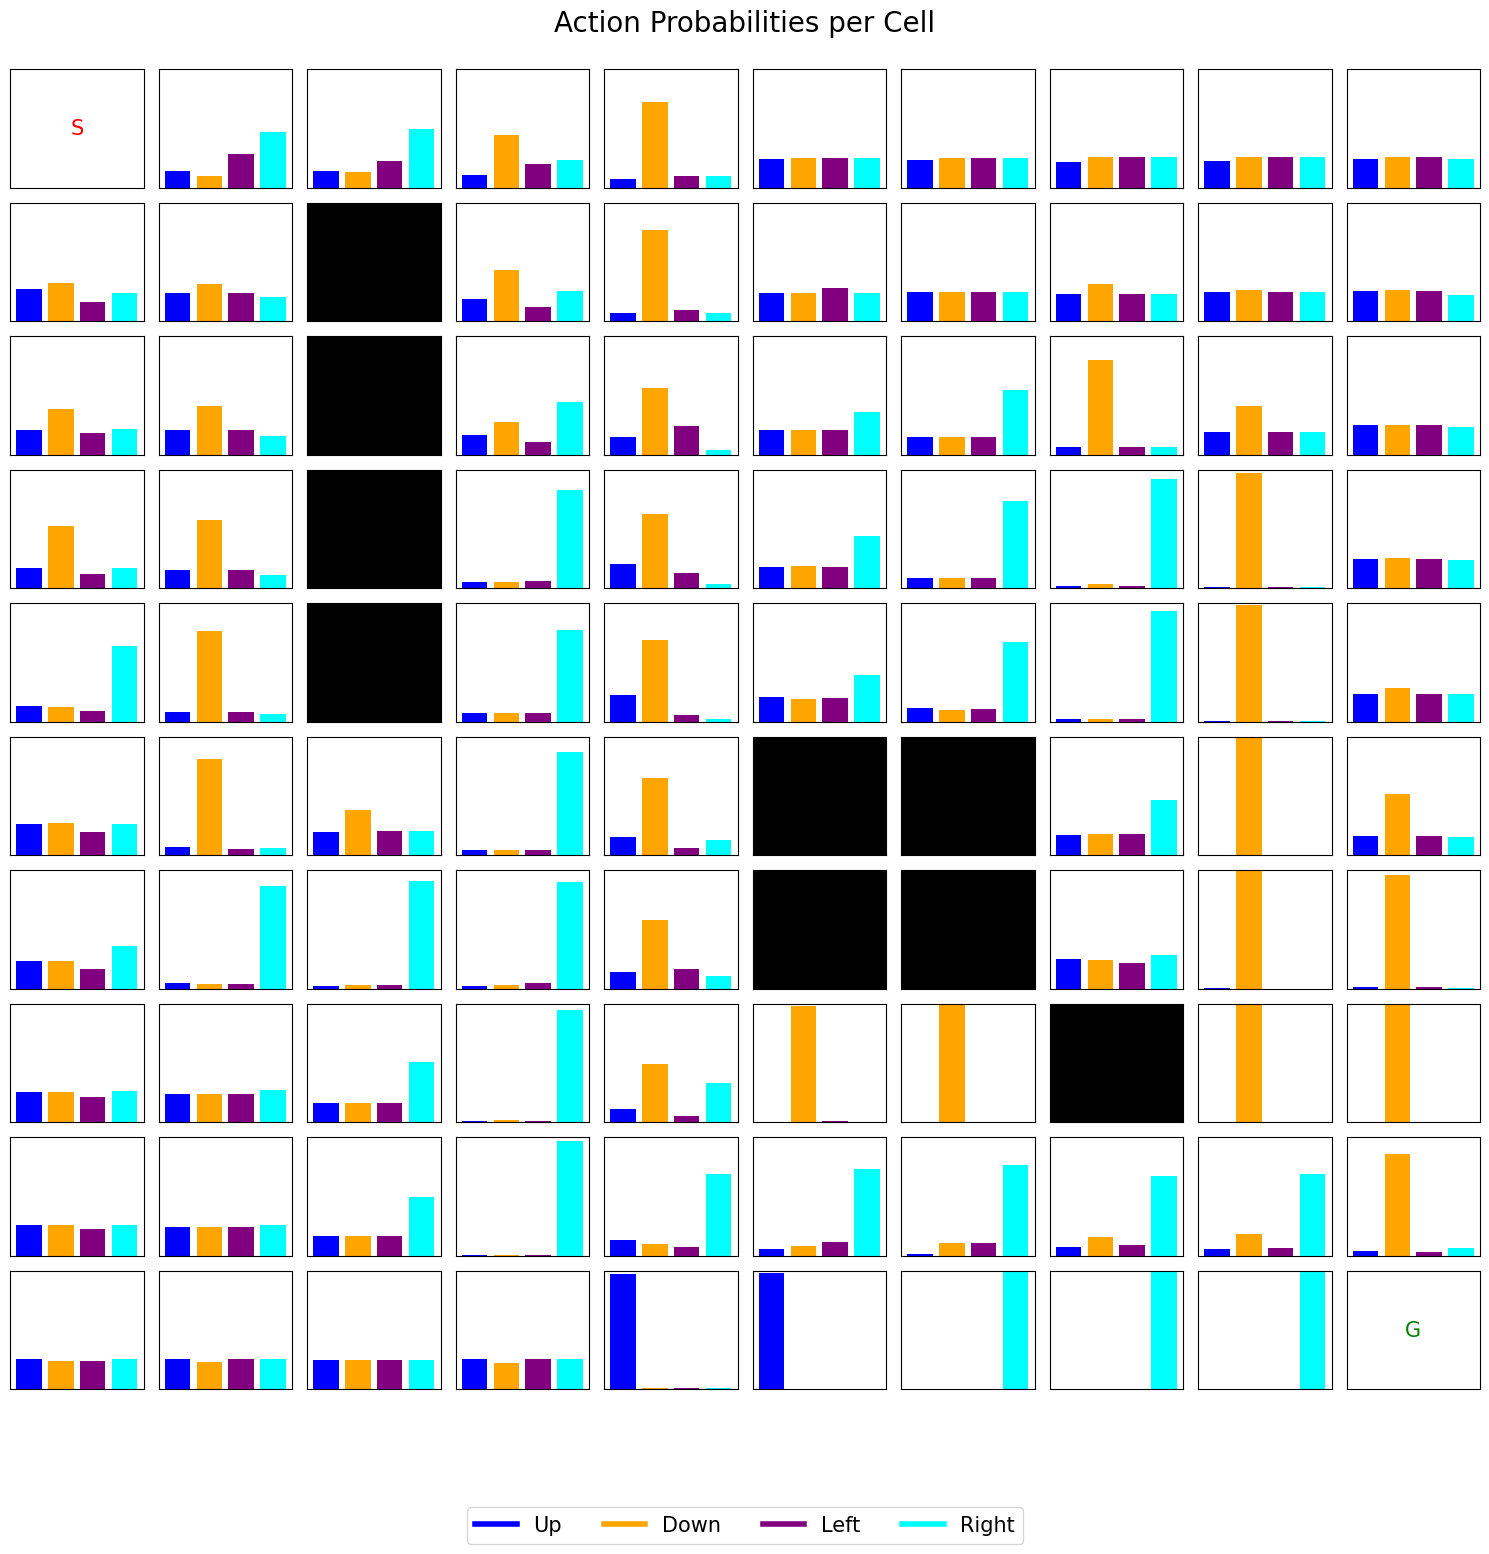

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define a more complex 2D grid environment with obstacles
grid_size = (10, 10)  # 10x10 grid
start_state = (0, 0)
goal_state = (9, 9)
obstacles = [(1, 2), (2, 2), (3, 2), (4, 2), (5, 5), (5, 6), (6, 5), (6, 6), (7, 7)]  # Obstacles

# Actions: up, down, left, right
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
num_actions = len(actions)

# Parameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 1000

# Initialize the Q-table
q_table = np.zeros(grid_size + (num_actions,))

# Define a function to check if a state is valid
def is_valid_state(state):
    x, y = state
    return (0 <= x < grid_size[0] and 0 <= y < grid_size[1] and state not in obstacles)

# Define a function to choose an action (epsilon-greedy)
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(num_actions)  # Explore
    else:
        x, y = state
        return np.argmax(q_table[x, y])  # Exploit

# Training loop
progress = []  # Track progress of the agent
for episode in range(num_episodes):
    state = start_state  # Start state
    total_reward = 0
    steps = 0
    while state != goal_state:
        x, y = state

        # Choose an action
        action = choose_action(state)
        dx, dy = actions[action]
        next_state = (x + dx, y + dy)

        # Check if the next state is valid
        if not is_valid_state(next_state):
            reward = -1  # Penalty for hitting the boundary or obstacle
            next_state = state  # Stay in the same state
        elif next_state == goal_state:
            reward = 10  # Reward for reaching the goal
        else:
            reward = -0.1  # Small penalty for each step

        # Update Q-value
        next_x, next_y = next_state
        q_table[x, y, action] += alpha * (
            reward + gamma * np.max(q_table[next_x, next_y]) - q_table[x, y, action]
        )

        # Update state and track progress
        state = next_state
        total_reward += reward
        steps += 1

    # Record progress
    progress.append((episode + 1, steps, total_reward))

    # Print progress
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Steps: {steps}, Total Reward: {total_reward:.2f}")

# Extract the policy
policy = np.full(grid_size, ' ', dtype=str)
action_probabilities = np.zeros(grid_size + (num_actions,))
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if (x, y) in obstacles:
            policy[x, y] = 'X'  # Obstacle
        elif (x, y) == goal_state:
            policy[x, y] = 'G'
        elif (x, y) == start_state:
            policy[x, y] = 'S'
        else:
            action_values = q_table[x, y]
            action_probs = np.exp(action_values) / np.sum(np.exp(action_values))
            action_probabilities[x, y] = action_probs
            action = np.argmax(action_values)
            if action == 0:
                policy[x, y] = '^'  # Up
            elif action == 1:
                policy[x, y] = 'v'  # Down
            elif action == 2:
                policy[x, y] = '<'  # Left
            elif action == 3:
                policy[x, y] = '>'  # Right

# Display the policy
print("Learned Policy:")
print("\n".join(["".join(row) for row in policy]))

# Visualize the policy
plt.figure(figsize=(10, 10))
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if policy[x, y] == 'X':
            plt.text(y, x, 'X', ha='center', va='center', color='black', fontsize=15)
        elif policy[x, y] == 'G':
            plt.text(y, x, 'G', ha='center', va='center', color='green', fontsize=15)
        elif policy[x, y] == 'S':
            plt.text(y, x, 'S', ha='center', va='center', color='red', fontsize=15)
        else:
            plt.text(y, x, policy[x, y], ha='center', va='center', color='blue', fontsize=15)
plt.xticks(range(grid_size[1]))
plt.yticks(range(grid_size[0]))
plt.gca().invert_yaxis()
plt.grid()
plt.title("Learned Policy with Obstacles")
plt.show()

# Visualize training progress
progress = np.array(progress)
plt.figure(figsize=(12, 5))
plt.plot(progress[:, 0], progress[:, 1], label="Steps per Episode")
plt.plot(progress[:, 0], progress[:, 2], label="Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Steps / Reward")
plt.legend()
plt.title("Training Progress")
plt.show()

# Visualize action probabilities
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 15))
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        ax = axes[x, y]
        ax.set_xticks([])
        ax.set_yticks([])
        if (x, y) in obstacles:
            ax.set_facecolor('black')
        elif (x, y) == goal_state:
            ax.text(0.5, 0.5, 'G', ha='center', va='center', color='green', fontsize=15)
        elif (x, y) == start_state:
            ax.text(0.5, 0.5, 'S', ha='center', va='center', color='red', fontsize=15)
        else:
            probs = action_probabilities[x, y]
            if np.sum(probs) > 0:  # Only visualize non-zero probabilities
                ax.bar(range(num_actions), probs, color=['blue', 'orange', 'purple', 'cyan'])
                ax.set_ylim(0, 1)

# Add legend for action probabilities
colors = ['blue', 'orange', 'purple', 'cyan']
labels = ['Up', 'Down', 'Left', 'Right']
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=15, bbox_to_anchor=(0.5, -0.05))
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.suptitle("Action Probabilities per Cell", fontsize=20, y=0.98)
plt.show()
